# Frequency Distribution

In this tutorial, we will learn how to organize data in frequency and groiuped frequency tables. Frequency tables allow us to transform large and incomprehensible amounts of data to a format we can understand.

![statistics-pic-3](https://raw.githubusercontent.com/tongNJ/Dataquest-Online-Courses-2022/main/Pictures/statistics-pic-3.PNG)

We will continue to use WNBA.csv dataset to explore the concept of frequency distribution

## Concepts

- A table that shows the frequency for each unique value in a distribution is called a frequency distribution table.


- The frequencies can be expressed as:
  - Absolute counts (absolute frequencies).
  - Proportions or percentages (relative frequencies).


- The percentage of values that are equal or less than a value is called the percentile rank of 
  - For instance, if the percentile rank of a value of 32 is 57%, 57% of the values are equal to or less than 32.


- If a value has a percentile rank of , we say that is the percentile. For instance, if 32 has a percentile rank of 57%, we say that 32 is the 57th percentile.


- Frequency distribution tables can be grouped in class intervals to form grouped frequency distribution tables. As a rule of thumb, 10 is a good number of class intervals to choose because it offers a good balance between information and comprehensibility.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_loc = 'D:/Dataquest/Dataquest 2022 Learning/Datasets/'
wnba = pd.read_csv(dataset_loc + 'wnba.csv')

In [3]:
# Using the Series.value_counts() method, generate frequency distribution tables for the following columns: [Pos, Height]
wnba['Pos'].value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [4]:
# If the frequency variable is measured in nominal basis, we can also change index order by using iloc[] method.
wnba['Pos'].value_counts().iloc[[2,4,1,3,0]]

C      25
F/C    12
F      33
G/F    13
G      60
Name: Pos, dtype: int64

In [5]:
# When we analyze distributions, we're often interested in answering questions about proportions and percentages. 
# It's slightly faster though to use Series.value_counts() with the normalize parameter set to True:
wnba['Pos'].value_counts(normalize=True)*100


G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: Pos, dtype: float64

In [6]:
# wnba['Height'].value_counts() returns a Series object with the measures of height as indices. 
# This allows us to sort the table by index using the Series.sort_index() method:
wnba['Height'].value_counts().sort_index()

165     1
168     2
170     6
173    11
175    16
178     8
180     7
183    11
185    15
188    20
191    11
193    18
196     9
198     5
201     2
206     1
Name: Height, dtype: int64

- A **percentile rank** of a value **x** in a frequency distribution is given by the percentage of values that are equal or less than **x**

- We can arrive at the same answer a bit faster using the **percentileofscore(a, score, kind='weak')** function from **scipy.stats**

In [7]:
# For example, if we want to find waht percentage of players are 23 years or younger?
percentile_age_23orless = wnba['Age'].value_counts(normalize=True).sort_index().iloc[:3].sum()
print(f'{round(percentile_age_23orless*100,0)}% of total players are 23 years or younger.')

19.0% of total players are 23 years or younger.


In [8]:
from scipy.stats import percentileofscore
# We need to use kind = 'weak' to indicate that we want to find the percentage of values that are equal to or less than the value 
# we specify in the score parameter.
percentile_age_23orless = percentileofscore(a=wnba['Age'],score=23,kind='weak')
print(percentile_age_23orless)

18.88111888111888


In [9]:
# What percentage of players are 30 years or older?
percentile_age_30orOld = 100 - percentileofscore(a=wnba['Age'],score=29,kind='weak')
print(f'{round(percentile_age_30orOld,0)}% of total players are 30 years or older.')

27.0% of total players are 30 years or older.


In [10]:
# pandas describe method has percentiles parameter which can be customized to find specific percentiles
wnba['Age'].describe()

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

In [11]:
print(wnba['Age'].describe(percentiles=[.25,.5,.75,.95]).iloc[3:])
print(f'95% of total players are  years or younger')

min    21.0
25%    24.0
50%    27.0
75%    30.0
95%    34.0
max    36.0
Name: Age, dtype: float64
95% of total players are  years or younger


- If the variable is measured on an interval or ratio scale, a common solution to this problem is to group the values in equal intervals. Fortunately, pandas can handle this process gracefully. We only need to make use of the **bins** parameter of **Series.value_counts()** 


- Because we group values in a table to get a better sense of frequencies in the distribution, the table we generated above is also known as a **grouped frequency distribution table**. Each group (interval) in a grouped **frequency distribution table** is also known as a **class interval**.


- Examine the frequency table for the PTS (total points) variable trying to find some patterns in the distribution of values. Then, generate a grouped frequency distribution table for the PTS variable with the following characteristics:

In [12]:
PTS_grouped_frequency = wnba['PTS'].value_counts(bins=10,normalize=True).sort_index(ascending=False)*100

print(f'PTS Grouped Frequency Distribution Table \n{round(PTS_grouped_frequency,1)}')

PTS Grouped Frequency Distribution Table 
(525.8, 584.0]     3.5
(467.6, 525.8]     2.8
(409.4, 467.6]     5.6
(351.2, 409.4]     7.0
(293.0, 351.2]     5.6
(234.8, 293.0]    11.9
(176.6, 234.8]    14.0
(118.4, 176.6]    11.9
(60.2, 118.4]     16.8
(1.417, 60.2]     21.0
Name: PTS, dtype: float64


- Imagine we'd have to publish the table above in a blog post or a scientific paper. The readers will have a hard time understanding the intervals we chose. They'll also be puzzled by the decimal numbers because points in basketball can only be integers.


- To fix this, we can define the intervals ourselves. For the table above, we can define six intervals of 100 points each, and then count how many values fit in each interval. 


- **pd.interval_range()**

In [13]:
intervals = pd.interval_range(start=0,end=600,periods=6)
#intervals = pd.interval_range(start=0,end=600,freq=100)
intervals

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')

In [14]:
gr_freq_table = wnba['PTS'].value_counts(bins=intervals).sort_index()
gr_freq_table

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
Name: PTS, dtype: int64

In [15]:
gr_freq_table.sum()

143

## Visualizing Frequency Distributions

- To find patterns in a frequency table we have to look up the frequency of each unique value or class interval and at the same time compare the frequencies. This process can get time consuming for tables with many unique values or class intervals, or when the frequency values are large and hard to compare against each other.


- We can solve this problem by visualizing the data in the tables with the help of graphs. Graphs make it much easier to scan and compare frequencies, providing us with a single picture of the entire distribution of a variable.


- Because they are easy to grasp and also eye-catching, graphs are a better choice over frequency tables if we need to present our findings to a non-technical audience.


- We'll learn about three kinds of graphs:
  - Bar plots.
  - Pie charts.
  - Histograms.

<AxesSubplot:>

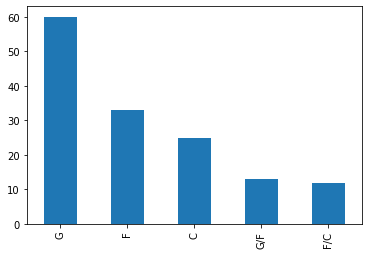

In [16]:
wnba['Pos'].value_counts().plot.bar()

<AxesSubplot:>

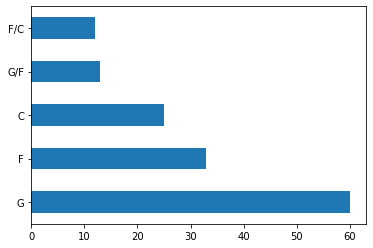

In [17]:
wnba['Pos'].value_counts().plot.barh()

In [18]:
wnba['Experience'].replace('R','0',inplace=True)
wnba['Experience']= wnba['Experience'].astype('int')
exp_label = ['Rookie','Little experience','Experienced','Very experienced','Veteran']
exp_label_numerical =[[0,1],[1,4],[4,6],[6,11],[11,30]]

In [19]:
wnba['Exp_ordinal'] = np.nan
iteration = 0
for i in exp_label_numerical:
    l_bound = i[0]
    u_bound = i[1]
    wnba.loc[(wnba['Experience']>=l_bound) & (wnba['Experience'] < u_bound),'Exp_ordinal'] = exp_label[iteration]
    iteration += 1

<AxesSubplot:>

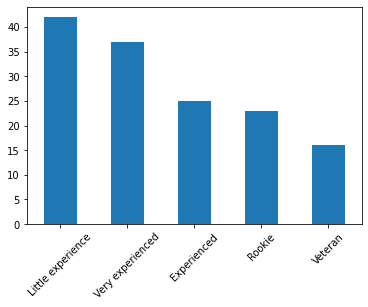

In [20]:
wnba['Exp_ordinal'].value_counts().plot.bar(rot='45')

### Pie Chart

- To give a pie chart the right shape, we need to specify equal values for height and width in the figsize parameter of Series.plot.pie(). The Exp_ordinal is the label of a hidden y-axis, which means we can use the **plt.ylabel()** function to remove it. 


- Ideally, we'd have proportions or percentages displayed on each wedge of the pie chart. Fortunately, this is easy to get using the **autopct** parameter. This parameter accepts Python string formatting, and we'll use the string **'%.1f%%'** to have percentages displayed with a precision of one decimal place. Let's break down this string formatting:

![statistics-pic-e](https://raw.githubusercontent.com/tongNJ/Dataquest-Online-Courses-2022/main/Pictures/statistics-pic-4.PNG)

Text(0, 0.5, '')

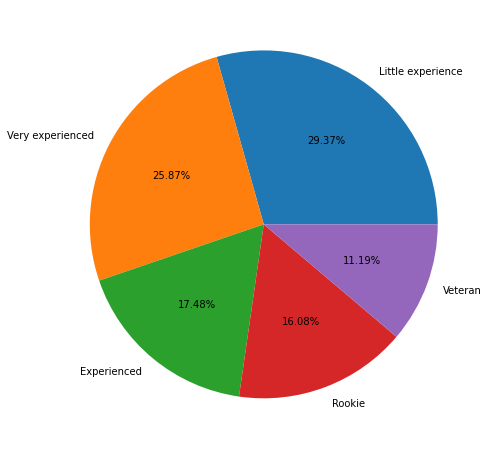

In [21]:
wnba['Exp_ordinal'].value_counts().plot.pie(figsize=(8,8),autopct = '%.2f%%')
plt.ylabel('')

Under the hood, the **wnba['PTS'].plot.hist()** method:

- Generated a grouped frequency distribution table for the PTS variable with ten class intervals.
- For each class interval it plotted a bar with a height corresponding to the frequency of the interval.

In [22]:
wnba['PTS'].value_counts(bins=10).sort_index()

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64

<AxesSubplot:ylabel='Frequency'>

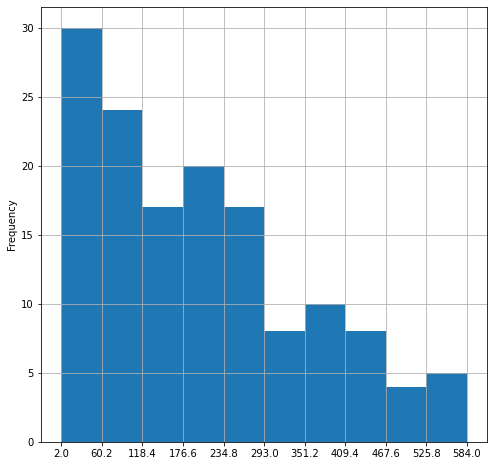

In [23]:
wnba['PTS'].plot.hist(figsize = (8,8),grid = True,xticks = np.arange(2,585,58.2))

<AxesSubplot:ylabel='Frequency'>

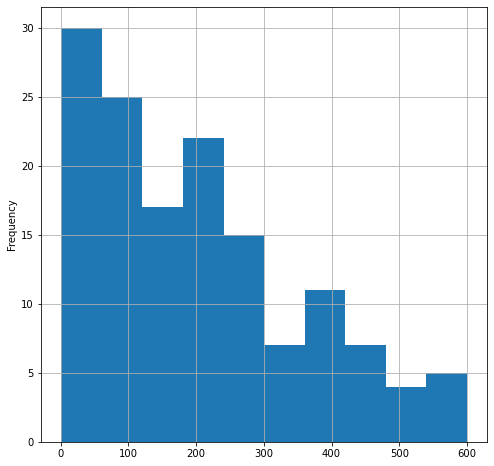

In [24]:
wnba['PTS'].plot.hist(figsize = (8,8),grid = True,bins=10,range=(1,600))

## Comparing Frequency Distribution
In the follow session, we'll learn about the graphs we can use to compare multiple frequency distributions at once.

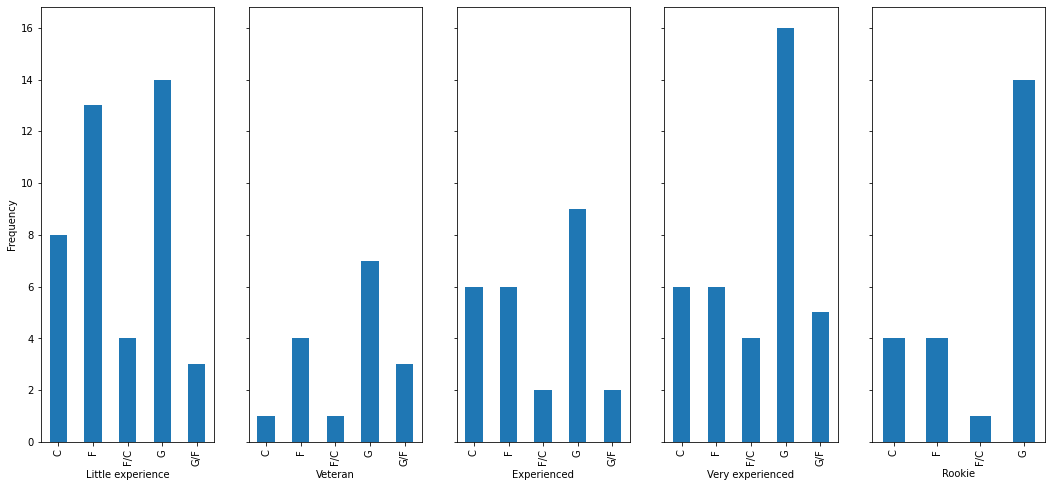

In [25]:
# Let's say we're interested in analyzing how the distribution of the Pos variable (player position) varies with 
# the level of experience. In other words, we want to determine, for instance, what are the positions on the court 
# that rookies play most as, and how do rookies compare to veterans with respect to positions on the field.


wnba.loc[wnba['Exp_ordinal'] == 'Rookie','Pos'].value_counts(normalize=True).sort_index()

fig,axs = plt.subplots(1,len(wnba['Exp_ordinal'].unique()),figsize=(18,8),sharey=True)
i=0
for exp_level in wnba['Exp_ordinal'].unique():
    sub_freq_table = wnba.loc[wnba['Exp_ordinal'] == exp_level,'Pos'].value_counts().sort_index()
    sub_freq_table.plot.bar(ax=axs[i])   
    i+=1
i=0
for ax in axs.flat:
    ax.set(ylabel='Frequency',xlabel=wnba['Exp_ordinal'].unique()[i])
    i+=1

#     print(exp_level)

### Matplotlib has a style.available attributes which allow you to see all the avaialble built-in styles

In [26]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Count Plot')

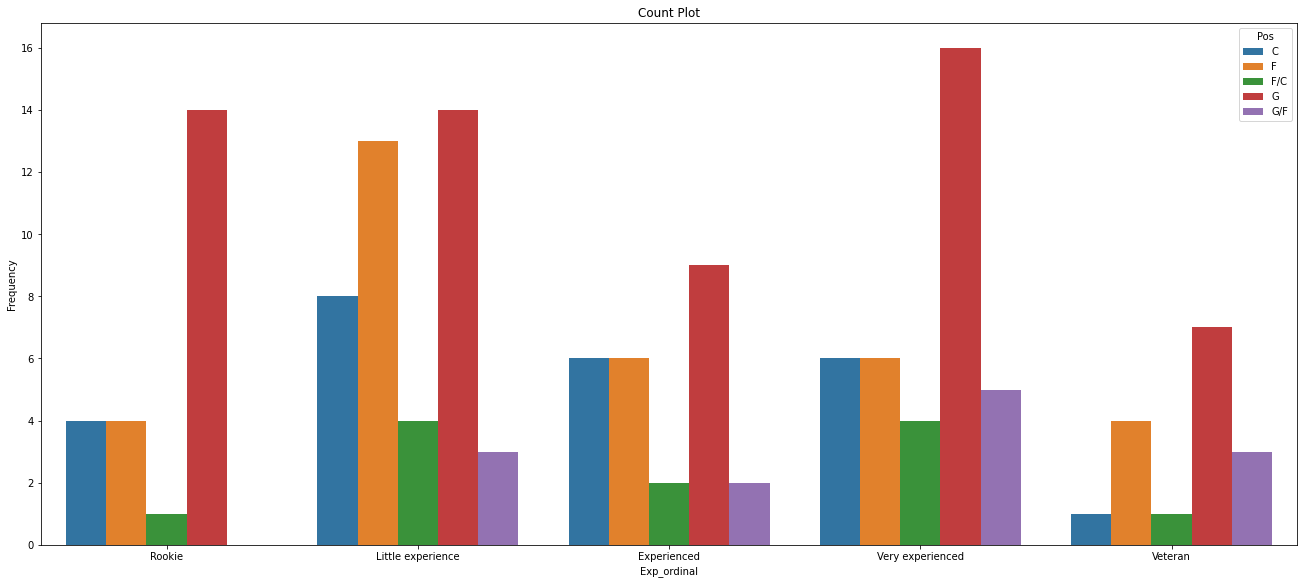

In [27]:
import seaborn as sns

exp_order = ['Rookie','Little experience', 'Experienced', 'Very experienced', 'Veteran']
h_order = ['C','F','F/C','G','G/F']

# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.xkcd(False)
fig, ax = plt.subplots(figsize=(18,8),layout='constrained')

sns.countplot(x='Exp_ordinal',hue='Pos',data=wnba,order = exp_order,hue_order = h_order)
# ax.set(ylabel='Frequency')
ax.set_ylabel('Frequency')
ax.set_title('Count Plot')

### Test

- When players get past a certain age, they become less and less physically fit as they get older. Intuitively, the fitness level of a player should directly affect how much she plays in a season. 

- Let's hypothesize that older players generally play less than this average of 497 minutes, while younger players generally play more.

- Let's test if our hypothesize is true by plotting count plot

In [28]:
#
mean_age = wnba['Age'].mean()
print(f'The average age of WNBA players in 2016 is {int(mean_age)}')

mean_mins_played = wnba['MIN'].mean()
print(f'The average minutes played in 2016 is {int(mean_mins_played)}')

The average age of WNBA players in 2016 is 27
The average minutes played in 2016 is 496


In [29]:
# create an ordinal variable called 'age_mean_relative', label each player as 'old' if her age is or over 27, 
# and 'young' if her age is below 27
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x>= mean_age else 'young')

# create an ordinal variable called 'mins_mean_relative', label each player as 'average or above' if she played at least 496 mins,
# otherwise, label her as 'below average'
wnba['mins_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x>=497 else 'below average')

wnba[['Name','Age','age_mean_relative','MIN','mins_mean_relative']].head()

,Name,Age,age_mean_relative,MIN,mins_mean_relative
0,Aerial Powers,23,young,173,below average
1,Alana Beard,35,old,947,average or above
2,Alex Bentley,26,young,617,average or above
3,Alex Montgomery,28,old,721,average or above
4,Alexis Jones,23,young,137,below average


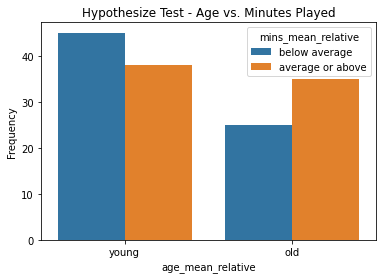

In [30]:
# now draw a count plot with x-axis as age_mean_relative and hue as 'mins_mean_relative'
# plt.style.use('ggplot')
sns.countplot(x='age_mean_relative',hue='mins_mean_relative',data=wnba)

plt.ylabel('Frequency')
plt.title('Hypothesize Test - Age vs. Minutes Played')
plt.show()

<AxesSubplot:ylabel='Frequency'>

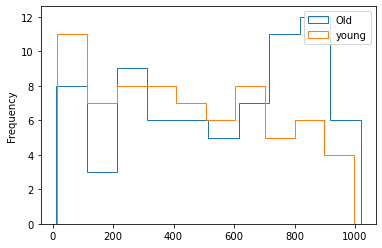

In [35]:
# plt.style.use(False)
wnba.loc[wnba['Age']>=27,'MIN'].plot.hist(histtype='step',label='Old',legend=True)

wnba.loc[wnba['Age']<27,'MIN'].plot.hist(histtype='step',label='young',legend=True)

<AxesSubplot:ylabel='Density'>

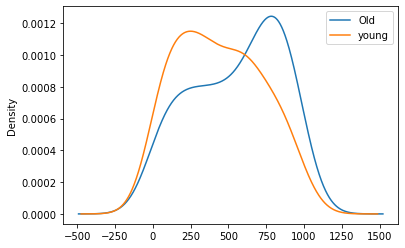

In [36]:
# We can smooth out our two histograms above for old and young players using the Series.plot.kde() function:

wnba.loc[wnba['Age']>=27,'MIN'].plot.kde(label='Old',legend=True)

wnba.loc[wnba['Age']<27,'MIN'].plot.kde(label='young',legend=True)

<AxesSubplot:xlabel='Pos', ylabel='Height'>

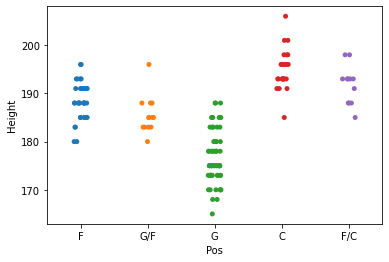

In [38]:
sns.stripplot(x='Pos', y='Height', data=wnba, jitter=True)

<AxesSubplot:xlabel='Pos', ylabel='Height'>

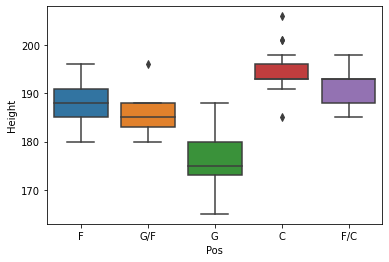

In [39]:
sns.boxplot(x='Pos', y='Height', data=wnba)